In [56]:
import os

#### Change your working directory to the project's Github path/source_codes ( to import custom functions)

In [59]:
cd ./source_codes
# or: os.chdir('C:/Users/git/ece143project/source_codes')

In [18]:
# Imports go here
import plotly
import c_05_analysis_hotlist_analysis
from c_05_analysis_hotlist_analysis import *
from c_11_analysis_genre_sentiment_analysis import read_combined_data, yearly_genre_prep, single_genre_plotter, radar_plotter

In [60]:
from c_06_analysis_artist_popularity import *
from c_09_analysis_genreacous import *
from c_10_analysis_generation_wordcloud import *

### artist popularity

In [ ]:
top4_artist_list=[]
start=1960
for g in range(6):
    top4_artist_list=get_top4_artist(start+g*10,start+g*10+10)        
    year_dict=get_popularity_artist(top4_artist_list)
    plot_artist_popularity(year_dict,top4_artist_list,g)

<img src="img/ap1960s.jpg" width="200"/><img src="img/ap1970s.jpg" width="200"/><img src="img/ap1980s.jpg" width="200"/><img src="img/ap1990s.jpg" width="200"/><img src="img/ap2000s.jpg" width="200"/><img src="img/ap2010s.jpg" width="200"/>

In [41]:
# Extract each year's dataset and get information into objects

for year in range(1960, 2020):
    df = pd.read_csv('../data/combined_dataset/lyrics&features_{}.csv'.format(year))
    yearly_length_dict[year] = get_yearly_length(df) 
    yearly_duration_dict[year] = get_yearly_duration(df)
    unique_words_dict[year]=get_unique_words(df)

### Unique words

In [22]:
plot_acous_curve(unique_words_dict,80,'Unique Word Counts','80 Words','Average Unique Word Counts',ref=True) 

![title](img/unique_words_counts.png)

#### Average Lyrics Length

In [8]:
plot_acous_curve(yearly_length_dict, 200, 'Lyric Length[words]', '200 Words', 'Lyric Length', ref = True)

![Average Lyrics Length](./img/average_lyric_length.png)

#### Average Song Duration

In [15]:
plot_acous_curve(yearly_duration_dict, 200, 'Song Duration[seconds]', '200 seconds', 'Song Duration', ref = True)

![Average Song Duration](./img/average_song_duration.png)

#### Song appears in most years 

In [25]:
#song_rank_plotly(score, subject)

![title](img/rockin_rank_plot.png)

### Genre Trend and Acoustic Information

In [44]:
speechiness_dict={}
acousticness_dict={}
loudness_dict={}
genre_dict={}
for year in range(1960, 2020):
    df = pd.read_csv('../data/combined_dataset/lyrics&features_{}.csv'.format(year))
    speechiness_dict[year] = get_acous_median('speechiness',df)
    acousticness_dict[year] = get_acous_median('acousticness',df)
    loudness_dict[year]=get_acous_median('loudness',df)
    genre_dict[year]=get_genre_count(df,"rock")
    

In [34]:
plot_bubble(genre_dict,speechiness_dict,"Rap","Speechiness")

![title](img/rap_speechiness.png)

In [29]:
plot_bubble(genre_dict,acousticness_dict,"Blues","Acousticness")

![title](img/Rap_Speechiness.png)

In [ ]:
plot_bubble(genre_dict,loudness_dict,"Rock","Loudness")

![title](img/Rock_Loudness.png)

#### Genre Summaries and Analyses

In [22]:
# Define your git path (not source codes, specify the main path)
git_path = 'C:/Users/iocak/OneDrive/Masaüstü/git/ece143project'

# read the data
combined_df = read_combined_data(git_path = git_path, combined_path = '/data/combined_dataset/')
# Call Genre Summarizer
yearly_genres = yearly_genre_prep(combined_df)

C:\Users\iocak\OneDrive\Masaüstü\git\ece143project\source_codes\c_11_analysis_genre_sentiment_analysis.py:34: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




#### Genre Popularity vs Year

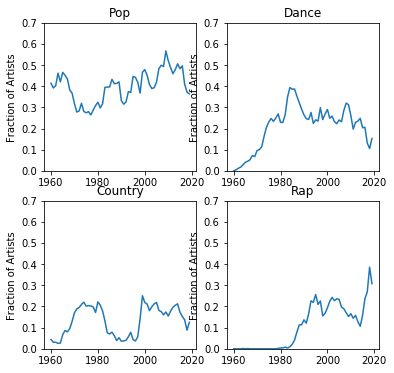

In [7]:
#rise or No Change
plt.figure(figsize = (6, 6))
single_genre_plotter(yearly_genres, 'pop', 'Pop', (2, 2), 1)
single_genre_plotter(yearly_genres, 'electronic_dance_disco', 'Dance', (2, 2), 2)
single_genre_plotter(yearly_genres, 'country', 'Country', (2, 2), 3)
single_genre_plotter(yearly_genres, 'hip_hop', 'Rap', (2, 2), 4)

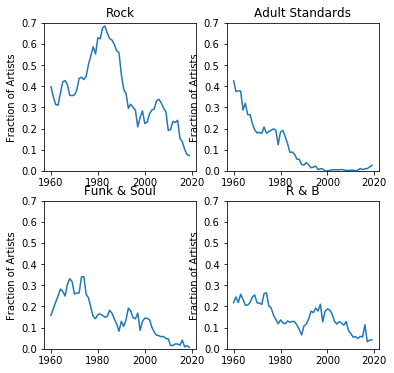

In [12]:
#dying
plt.figure(figsize = (6, 6))
single_genre_plotter(yearly_genres, 'rock', 'Rock', (2, 2), 1)
single_genre_plotter(yearly_genres, 'adult_standards', 'Adult Standards', (2, 2), 2)
single_genre_plotter(yearly_genres, 'funk_soul', 'Funk & Soul', (2, 2), 3)
single_genre_plotter(yearly_genres, 'rnb', 'R & B', (2, 2), 4)

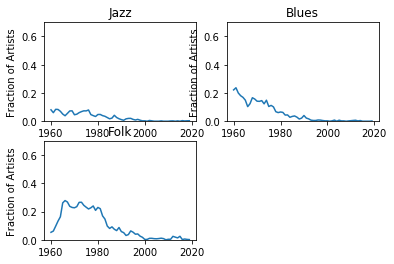

In [10]:
single_genre_plotter(yearly_genres, 'jazz', 'Jazz', (2, 2), 1)
single_genre_plotter(yearly_genres, 'blues', 'Blues', (2, 2), 2)
single_genre_plotter(yearly_genres, 'folk', 'Folk', (2, 2), 3)

#### Most Popular Genres in Years with Emphasis

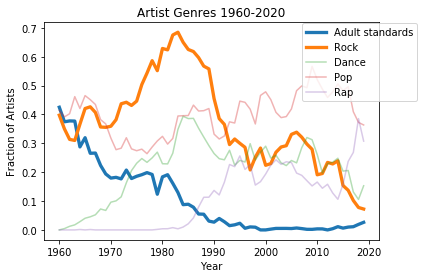

In [14]:
#60s
plt.plot(yearly_genres['date'], yearly_genres['adult_standards'], label = 'Adult standards', alpha = 1, linewidth=3.3)
plt.plot(yearly_genres['date'], yearly_genres['rock'], label = 'Rock', alpha = 1, linewidth=3.3)
plt.plot(yearly_genres['date'], yearly_genres['electronic_dance_disco'], label = 'Dance', alpha = 0.35)
plt.plot(yearly_genres['date'], yearly_genres['pop'], label = 'Pop', alpha = 0.35)
plt.plot(yearly_genres['date'], yearly_genres['hip_hop'], label = 'Rap', alpha = 0.35)
plt.legend(loc = 1, bbox_to_anchor=(1.13, 1.02))
plt.title('Artist Genres 1960-2020')
plt.ylabel('Fraction of Artists')
plt.xlabel('Year')
plt.show()

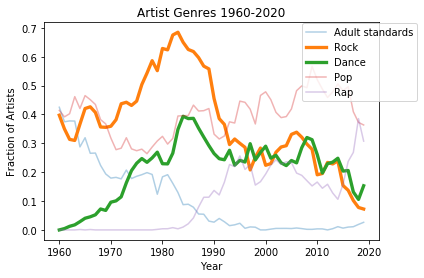

In [15]:
#70s 80s
plt.plot(yearly_genres['date'], yearly_genres['adult_standards'], label = 'Adult standards', alpha = 0.35)
plt.plot(yearly_genres['date'], yearly_genres['rock'], label = 'Rock', alpha = 1, linewidth=3.3)
plt.plot(yearly_genres['date'], yearly_genres['electronic_dance_disco'], label = 'Dance', alpha = 1, linewidth=3.3)
plt.plot(yearly_genres['date'], yearly_genres['pop'], label = 'Pop', alpha = 0.35)
plt.plot(yearly_genres['date'], yearly_genres['hip_hop'], label = 'Rap', alpha = 0.35)
plt.legend(loc = 1, bbox_to_anchor=(1.13, 1.02))
plt.title('Artist Genres 1960-2020')
plt.ylabel('Fraction of Artists')
plt.xlabel('Year')
plt.show()

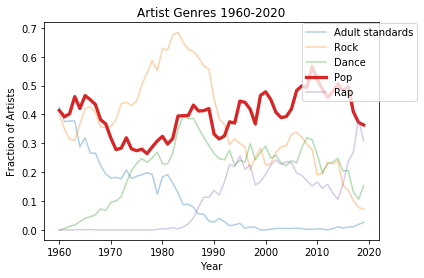

In [16]:
#90s 00s
plt.plot(yearly_genres['date'], yearly_genres['adult_standards'], label = 'Adult standards', alpha = 0.35)
plt.plot(yearly_genres['date'], yearly_genres['rock'], label = 'Rock', alpha = 0.35)
plt.plot(yearly_genres['date'], yearly_genres['electronic_dance_disco'], label = 'Dance', alpha = 0.35)
plt.plot(yearly_genres['date'], yearly_genres['pop'], label = 'Pop', alpha = 1, linewidth=3.3)
plt.plot(yearly_genres['date'], yearly_genres['hip_hop'], label = 'Rap', alpha = 0.35)
plt.legend(loc = 1, bbox_to_anchor=(1.13, 1.02))
plt.title('Artist Genres 1960-2020')
plt.ylabel('Fraction of Artists')
plt.xlabel('Year')
plt.show()

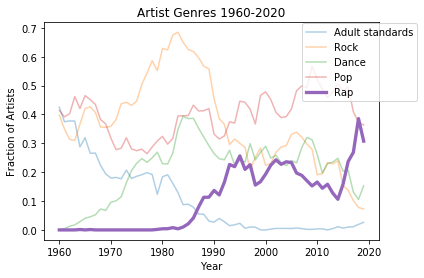

In [18]:
#10s
plt.plot(yearly_genres['date'], yearly_genres['adult_standards'], label = 'Adult standards', alpha = 0.35)
plt.plot(yearly_genres['date'], yearly_genres['rock'], label = 'Rock', alpha = 0.35)
plt.plot(yearly_genres['date'], yearly_genres['electronic_dance_disco'], label = 'Dance', alpha = 0.35)
plt.plot(yearly_genres['date'], yearly_genres['pop'], label = 'Pop', alpha = 0.35)
plt.plot(yearly_genres['date'], yearly_genres['hip_hop'], label = 'Rap', alpha = 1, linewidth=3.3)
plt.legend(loc = 1, bbox_to_anchor=(1.13, 1.02))
plt.title('Artist Genres 1960-2020')
plt.ylabel('Fraction of Artists')
plt.xlabel('Year')
plt.show()

#### Genre Popularity in Decades - Radar Plots

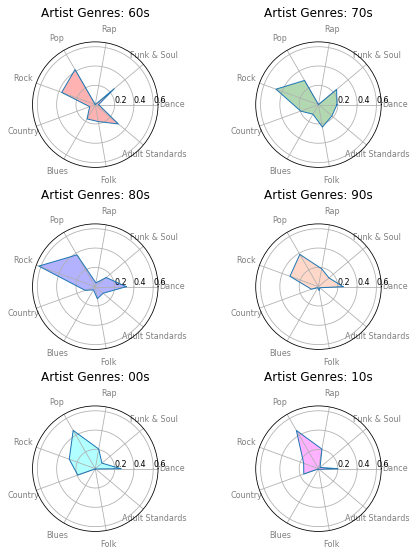

In [21]:
# summarize genres by decade, Radar Plots
filter_columns = ['electronic_dance_disco', 'funk_soul', 'hip_hop', 'pop', 'rock', 'country', 
                  'blues', 'folk', 'adult_standards']

new_names = ['Dance', 'Funk & Soul', 'Rap', 'Pop', 'Rock', 'Country', 
                  'Blues', 'Folk', 'Adult Standards']

decade_genres = yearly_genres.groupby(['decade'])[filter_columns].mean().reset_index()
decade_genres.rename(columns = dict(zip(filter_columns, new_names)), inplace = True)

plt.figure(figsize = (8, 8))
radar_plotter(decade_genres, '60s', (3, 2), 1)
radar_plotter(decade_genres, '70s', (3, 2), 2)
radar_plotter(decade_genres, '80s', (3, 2), 3)
radar_plotter(decade_genres, '90s', (3, 2), 4)
radar_plotter(decade_genres, '00s', (3, 2), 5)
radar_plotter(decade_genres, '10s', (3, 2), 6)

### Sentiment Analysis

In [45]:
sentiment_dict={}
valence_dict={}
for year in range(1960, 2020):
    df = pd.read_csv('../data/combined_dataset/lyrics&features_{}.csv'.format(year))
    sentiment_dict[year]=get_acous_list('sentiment',df)
    valence_dict[year]=get_acous_list('valence',df)
plot_acous_curve(sentiment_dict,0.115,'Song Sentiment','Reference Line','Average Sentiment',ref=True) 
plot_acous_curve(valence_dict,0.115,'Song Valence','Reference Line','Average Valence',ref=False) 

![title](img/Song_Sentiment.png)

![title](img/Song_Valence.png)

### WordCloud for decades

In [ ]:
path="../data/combined_dataset"  
path_list=os.listdir(path)
path_list.sort()  
for index,filename in enumerate(path_list):
    df=pd.read_csv(os.path.join(path,filename))
    if index==0:
        year_list=[]
    for i in range(len(df)):
        cur_list = df.loc[i,'words'].replace('\'', '')
        cur_list = cur_list.strip('][').split(', ')
        if len(cur_list) != 0:
            for wd in cur_list:
                if wd in banned_word:wd='DT'
                if wd not in stop_words:year_list.append(wd)
                
    #convert list to string
    ss=' '.join(year_list)
    #if there are ten-year words already,then plot the wordcloud for this generation
    if index%10==0 and index!=0:
        plot_wordcloud(ss,index)
        year_list=[] #set the word list to empty

#### 1960s

<img src="img/wordcloud60.png" alt="Drawing" style="width: 200px;"/>

#### 1970s

<img src="img/wordcloud70.png" alt="Drawing" style="width: 200px;"/>

#### 1980s

<img src="img/wordcloud80.png" alt="Drawing" style="width: 200px;"/>

#### 1990s

<img src="img/wordcloud90.png" alt="Drawing" style="width: 200px;"/>

#### 2000s

<img src="img/wordcloud00.png" alt="Drawing" style="width: 200px;"/>

#### 2010s

<img src="img/wordcloud10.png" alt="Drawing" style="width: 200px;"/>